# Course Difficulty, Instructor Rating, and Fields of Study: a COGS 108 group project

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that student names will be included (but PIDs will be scraped from any groups who include their PIDs).

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

CAPE at University of Califronia, San Diego is an anonymous online rating sytem for students to provide feedback to the instrutors and their courses. In this data analysis study, we try to look at the correlation between course difficulty and instructor ratings on CAPE, and whether this correlation is significantly different among courses in different fields of study (STEM, Social Science, and Humanities).

# Names

- Sharon Chen
- Pamela Ghag
- Yuzi Chu
- Cheng Chang
- Stanley Hahm

<a id='research_question'></a>
# Research Question

Are there significant differences among courses under the Humanities, Social Science, and STEM departments at UCSD in terms of correlation between course difficulty and instructors’ ratings given through UCSD's official student-feedback platform, CAPE?

<a id='background'></a>

## Background & Prior Work

Our interest in this question stems from the shared experience of using the university's official student-feedback platform, CAPE, to get a basic understanding of certain classes (e.g. how difficult any one can be) and the teaching style of a professor. CAPE allows students to give feedback and ratings to their education, while also informing the incoming class of students about how rigorous the workload can get for a particular course. Students who observe these metrics can then get a broad overview of how a particular class could impact their educational experience for any relevant quarter at UCSD and decide whether or not to enroll. Given the potency of influence student feedback can have when it comes to how a particular course or instructor is perceived, we agree that it was especially important for us to study exactly which primary variables actually go into predicting whether or not a student is likely to recommend a particular professor, or at least grant him/her a favorable rating. 

This topic has been previously discussed by researchers. In a paper jointly published by Justin Esarey and Natalie Valdes titled "Unbiased, reliable, and valid student evaluations can still be unfair", the researchers used computational simulation "to show that, under ideal circumstances, even careful and judicious use of SETs [student evaluations of teaching] to assess faculty can produce an unacceptably high error rate... __a large difference in SET scores *fails* to reliably identify the best teacher in a pairwise comparison__"(1). The far-reaching implications of such biased outcomes are further highlighted in Colleen Flaherty’s blog on Inside Higher Ed, "Study: Student evaluations of teaching are deeply flawed". She indicates that the danger of such biased evaluations lays in the institution's heightened proclivity to "punish" professors marginalized by arbitrarily unfavorable ratings to teach unpopular courses (2).

Therefore, __understanding what factors impact instructors' ratings, as well as the possible biases present in such determinations, are essential to both educators and students__. With this in mind, we would like to investigate the question at a more micro-level, such that we are not simply looking for a correlation overall between course difficulty and instructors' rating. Rather, we wish to compare the extent to which this correlation is held across different departments. To reiterate our question, we aim to answer: Are there significant differences among courses under the Humanities, Social Science, and STEM departments at UCSD in terms of correlation between course difficulty and teachers’ ratings given through UCSD's official student-feedback platform, CAPE? 

We plan to compare the correlations between course difficulty and teachers' ratings for Humanities, Social Science, and STEM-focused courses. Using CAPE's data, we intend to __define course difficulty as the interaction between the average grade point average (GPA) received in a particular class and the number of hours spent studying for it__. Likewise, we intend to __determine teachers' ratings through the percentage of students who recommend the instructor for future iterations of a particular course__ (i.e. high percentage of recommendations = high rating; lower percentage of recommendations = low rating). 

With these metrics, our goal is to observe whether the correlation between course difficulty and teachers’ ratings holds constant across the Social Sciences, STEM, and Humanities departments, or if it is evaluated to be stronger/weaker for one department over another.

As a first step, we hand-picked some field of studies offered at UCSD and listed them into three categories:

__STEM__: Biology, Chemistry, Computer Science, Data Science, Mathematics, Physics, All Engineering;

__Social Science__: Political Science, Sociology, Psychology, Cognitive Science, Economics; 

__Humanities__: Fine Arts, Literature, Language Studies, Theatre, Film, English, Philosophy, Visual Arts, History

*NOTE: the list of courses representing each department at UCSD here are based on their designations within each department's website*

References:

(1) https://www.tandfonline.com/eprint/IMZDUUHTHCEDD4Q9VZYB/full?target=10.1080%2F02602938.2020.1724875&

(2) https://www.insidehighered.com/news/2020/02/27/study-student-evaluations-teaching-are-deeply-flawed

# Hypothesis


We define the difficulty of a course as (self-reported hours spent on average over the course / average GPA received of the course). We hypothesize that the student rating for instructors have a higher correlation with the difficulty level of the class for courses within the STEM department as opposed to those within the Humanities or Social Science departments.

This hypothesis is a speculation that we make based on our experience that on average, (1) the instructor rating for STEM courses are typically lower than that of Social Science and Humanities, and (2) STEM courses usually have lower average GPA, as well as higher average working hours. Therefore, we posit that the correlation between our defined "difficulty" and the instructor rating would be stronger.

# Dataset

__Dataset Name__: CAPE

__Link to the dataset__: https://raw.githubusercontent.com/dcao/seascape/master/data/data.csv

__Number of observations__: 51281 rows (pre-data cleaning)

__Description__: The CAPE dataset includes information on the professor teaching the course; the course name itself; the quarter in which the course was taken; average GPA received by students; percentage of students that recommend the professor; average GPA expected by students; and the field of study the course is categorized under. The raw dataset includes observations from Fall Quarter 2007 up to and including Spring Quarter 2020.

Each observation has the following columns:

- `instr`: instructor name

- `course`: course name

- `term`: school term

- `enrolled`: number of students enrolled

- `evals`: number of students evaluated

- `recClass`: percentage of students who recommend the class

- __`recInstr`: percentage of students who recommend the instructor__

- __`hours`: estimated hours spent per week to study for the course__

- `gpaExp`: average GPA *expected* by the students 

- __`gpaAvg`: average GPA actually *received* by the students__

We will be using `difficulty`, calcualted from `gpaAvg` and `hours`, as our primary predictor variables in our model with the outcome `recInstr`. We will analyze the magnitude of correlation between course difficulty (indicated through `gpaAvg` and `hours`) and professor rating (indicated through `recInstr`) for each of the Humanities, Social Sciences, and STEM-focused departments. 

As we are measuring course difficulty in terms of average GPA (e.g higher average GPA = lower difficulty, lower average GPA = higher difficulty), we decided to remove any observations that contain a null value in the average GPA column, as they would not contribute to helping us reach a conclusion. We will also be dropping observations from Winter Quarter 2020 and Spring Quarter 2020, as classes during this period were taken during the pandemic, and it would not be an objective indication of the professors capabilities as a teacher due to the extreme and sudden modifications of teaching styles required during these times, as well as the overall challenges experienced by students in their personal lives as a result of the pandemic.

# Setup

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
import patsy
import statsmodels.api as sm
from scipy import stats

import warnings
warnings.filterwarnings('ignore')

# Set font size for graph labels
sns.set(font_scale = 2)

# Round decimals when displaying DataFrames
pd.set_option('precision', 2)

# Make plots just slightly bigger for displaying well in notebook
# set plotting size parameter
plt.rcParams['figure.figsize'] = (10, 5)

In [38]:
# Read in data
cape = pd.read_csv("https://raw.githubusercontent.com/dcao/seascape/master/data/data.csv")

# Data Cleaning

Since we do not want any data that may be influenced by the COVID-19 pandemic, we want to __drop evaluations made for school term WI20 and SP20__, the lastest 2 terms recorded in the dataset.

In [39]:
cape = cape.drop(cape[(cape.term =='WI20') | (cape.term =='SP20')].index)
cape.head()

,instr,course,term,enrolled,evals,recClass,recInstr,hours,gpaExp,gpaAvg
0,"Butler, Elizabeth Annette",AAS 10,FA20,65,29,89.0,96.0,4.50,3.77,3.33
1,"Puritty, Chandler Elizabeth",AAS 190,FA20,19,5,100.0,100.0,2.10,4.00,NaN
2,"Andrews, Abigail Leslie",AIP 197T,FA20,34,11,100.0,100.0,4.06,3.67,NaN
3,"Jones, Ian William Nasser",ANAR 120,FA20,15,4,100.0,100.0,2.50,3.50,NaN
4,"Smith, Neil Gordon",ANAR 121,FA20,17,6,100.0,100.0,6.50,4.00,NaN


In [40]:
cape.dtypes

instr        object
course       object
term         object
enrolled      int64
evals         int64
recClass    float64
recInstr    float64
hours       float64
gpaExp      float64
gpaAvg      float64
dtype: object

__Data types__ seems to be what we want.

An important method for us to estimate the difficulty of the courses is the average GPA received by the students; therefore, data with no "gpaAvg" does not seem helpful for our purposes. We want to __drop all rows with NaN in the column of average GPA__.

In [41]:
cape = cape.dropna(subset=['gpaAvg'])

Next, we __change column names__ so they are more similar and "pythonic".

In [42]:
col_name_map = {
    "evals": "eval",
    "recClass": "rec_class",
    "recInstr": "rec_instr",
    "gpaExp": "gpa_exp",
    "gpaAvg": "gpa_rec"
}
cape = cape.rename(columns=col_name_map)
print(list(cape.columns))

['instr', 'course', 'term', 'enrolled', 'eval', 'rec_class', 'rec_instr', 'hours', 'gpa_exp', 'gpa_rec']


As stated above, due to privacy concern, we would like to hide the name of the instructor and the course. Here we will first __map insturctor names to an ID and delete their names from the DataFrame__.

In [43]:
# Change all instructor names to lower cases
cape["instr"] = cape["instr"].apply(lambda name: name.lower())

# Make a list of unique instructor name and IDs
instr_names = cape["instr"].unique()
instr_names.sort()
instr_ids = [("I_" + str(x)) for x in range(len(instr_names))]

# Make a map of names and IDs
instr_id_map = {n:i for (n,i) in zip(instr_names, instr_ids)}

# Switch instructor names to IDs
cape["instr"] = cape["instr"].apply(lambda name: instr_id_map[name])

# Reset DataFrame index
cape = cape.reset_index(drop=True)

We need to change course names to IDs as we need to __classify the disciplines (Humanities, Social Science, STEM) they belongs to__, and __hide class names for privacy__.

In [44]:
# takes out number in class course name so only class department
def class_department(str_in):
    # takes out number
    class_dep = re.sub(r'\d+', '', str_in)
    
    # takes out any extra letter. I.e. 'CHEM A' --> 'CHEM'
    class_dep_split = class_dep.split()
    class_dep = class_dep_split[0]
    return class_dep

# use class_department to change all courses to fit only department
cape['course'] = cape['course'].apply(class_department)

__Separate these majors into `stem`, `social_sci`, and `hum` fields.__

Note and disclaimer: When classifying courses, we try our best to rely upon their respective majors and departments; however, some outliers are hand-picked. We understand that this decision may cause biases in our result. Notably:
- 'ERC' and 'TMC' are discarded as college seminars.
- 'ESYS' and 'ENVR' are classified as social science, as they touch heavily on environmental policy and soical decisions.
- All college writing courses are classified as humanities.

In [45]:
#SOME OF THESE MAJORS HAVE DIFFERENT DEPARTMENT NAMES BUT SAME MAJOR
#For example: Anthroplogy = 'ANAR', 'ANBI', 'ANSC', 'ANTH'

#list of STEM majors
stem = ['BENG', 'BIBC', 'BICD', 'BIEB', 'BILD', 'BIMM', 'BIPN', 
        'BISP', 'CENG', 'CHEM', 'CHIN', 'CSE', 'DSC', 'ECE', 
        'FMPH', 'GLBH', 'HDS', 'MAE', 'MATH', 'NANO', 'PHYS',
        'SE', 'SIO', 'FPMU']

#list of social science majors
social_sci = ['ANAR', 'ANBI', 'ANSC', 'ANTH', 'CGS', 'COGS', 
              'CSS', 'DSGN', 'ECON', 'EDS', 'ENVR', 'ETHN',
              'ESYS', 'HIAF', 'HIEA', 'HIEU','HILA', 'HILD',
              'HINE', 'HISC', 'HITO', 'HIUS', 'INTL', 'MGT',
              'POLI', 'PSYC', 'SOCI', 'TWS', 'USP', 'CCS',
              'HDP', 'LAWS', 'HMNR', 'COGN', 'SOCE', 'STPA',
              'SOCA', 'SOCB', 'SOCC', 'SOCD','SOCL']

#list of humanities majors
hum = ['AAS', 'AWP', 'CAT', 'COMM', 'DOC', 'ENG', 'HUM', 'JAPN', 
       'LATI', 'LIGN', 'LTAM', 'LTCH', 'LTCS', 'LTEA', 'LTEN', 
       'LTEU', 'LTFR', 'LTGM', 'LTLA', 'LTRU', 'LTSP', 'LTTH', 
       'LTWL', 'LTWR', 'MMW', 'MUS', 'PHIL', 'RELI', 'TDAC', 'TDDE',
       'TDDM', 'TDDR', 'TDGE', 'TDHT', 'TDMV', 'TDPR', 'TDTR', 'VIS',
       'WCWP', 'LIHL', 'LTGK', 'LTIT', 'LTKO', 'TDPW', 'TDPF',
       'ELWR', 'ICAM', 'TDHD', 'JUDA', 'COCU', 'COHI', 'COMT', 'COSF', 
       'TDCH', 'LTAF']

We then make a new column for __determining the field of study__ of each course.

In [57]:
def set_field(course):
    if course in stem:
        return "stem"
    elif course in social_sci:
        return "social_sci"
    elif course in hum:
        return "hum"
    return np.nan

cape["field"] = cape["course"].apply(set_field)

In [60]:
# Drop all courses outside the range of all field of studies that we are looking at
cape.dropna(subset=["field"], inplace=True)

print(cape.shape)
cape.head()

(33398, 12)


,instr,course,term,enrolled,eval,rec_class,rec_instr,hours,gpa_exp,gpa_rec,field,eval_rate
0,I_457,AAS,FA20,65,29,89.0,96.0,4.50,3.77,3.33,hum,0.45
1,I_758,ANAR,FA20,41,16,100.0,100.0,4.00,3.81,3.79,social_sci,0.39
2,I_1099,ANBI,FA20,20,15,93.0,100.0,2.77,3.67,3.77,social_sci,0.75
3,I_3175,ANBI,FA20,22,15,66.0,73.0,5.17,3.27,2.99,social_sci,0.68
4,I_1137,ANBI,FA20,117,53,100.0,100.0,3.75,3.70,3.87,social_sci,0.45


# Data Analysis & Results

### Exploratory Data Analysis (EDA)

We first want to take a look at the general trend of our data.

In [48]:
print("Number of different instructors:", len(cape["instr"].unique()))
print("Number of different course IDs:", len(cape["course"].unique()))

print("Number of STEM observations: " + str(len(cape[cape["field"] == "stem"]))
      + "; instructors: " + str(len(cape[cape["field"] == "stem"]["instr"].unique())))

print("Number of Social Science observations: ", str(len(cape[cape["field"] == "social_sci"]))
      + "; instructors: " + str(len(cape[cape["field"] == "social_sci"]["instr"].unique())))

print("Number of Humanities observations: ", str(len(cape[cape["field"] == "hum"]))
      + "; instructors: " + str(len(cape[cape["field"] == "hum"]["instr"].unique())))

Number of different instructors: 4013
Number of different course IDs: 120
Number of STEM observations: 14222; instructors: 1670
Number of Social Science observations:  11081; instructors: 1515
Number of Humanities observations:  8970; instructors: 1104


We see here that __the number of courses offered at UCSD and the number of instructors differs among fields__. This may create a potential weak spot of our analysis.

In [49]:
cape.describe()

,enrolled,eval,rec_class,rec_instr,hours,gpa_exp,gpa_rec
count,34273.00,34273.00,34273.00,34273.00,34273.00,33931.00,34273.00
mean,100.04,51.11,87.31,87.20,5.80,3.46,3.23
std,91.58,51.61,12.22,14.85,2.35,0.29,0.40
min,20.00,3.00,0.00,0.00,0.50,1.60,1.21
25%,34.00,16.00,81.00,82.00,4.23,3.27,2.93
50%,63.00,32.00,90.00,92.00,5.39,3.46,3.22
75%,138.00,68.00,97.00,99.00,6.94,3.67,3.52
max,1064.00,509.00,100.00,100.00,20.33,4.00,4.00


We see that some courses have very few evaluations. __Check what those are and drop them__.

In [50]:
print("Dropped courses with less than 5 evaluations:", len(cape[cape["eval"] < 5]))
cape = cape[cape["eval"] >= 5]

Dropped courses with less than 5 evaluations: 335


If the ratios between evaluation and enrolled are too small, we may not receive an accurate reflection of the overall student feedback. We want to look at the relation between these two values.

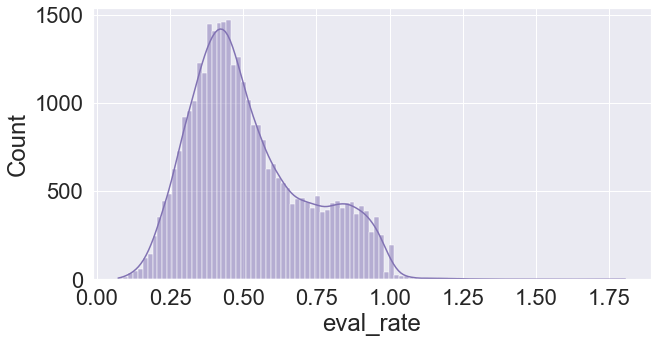

In [51]:
cape["eval_rate"] = cape["eval"] / cape["enrolled"]
plot_eval_rate = sns.histplot(cape["eval_rate"], kde=True, color="m")

We see that dropping some courses with low rating rates does not diminish our dataset significantly.

In [52]:
print("Dropped courses with less than 20% evaluation rates:", len(cape[cape["eval_rate"] < 0.2]))
cape = cape[cape["eval_rate"] >= 0.2]

Dropped courses with less than 20% evaluation rates: 540


In [53]:
print(cape.shape)
cape.head()

(33398, 12)


,instr,course,term,enrolled,eval,rec_class,rec_instr,hours,gpa_exp,gpa_rec,field,eval_rate
0,I_457,AAS,FA20,65,29,89.0,96.0,4.50,3.77,3.33,hum,0.45
1,I_758,ANAR,FA20,41,16,100.0,100.0,4.00,3.81,3.79,social_sci,0.39
2,I_1099,ANBI,FA20,20,15,93.0,100.0,2.77,3.67,3.77,social_sci,0.75
3,I_3175,ANBI,FA20,22,15,66.0,73.0,5.17,3.27,2.99,social_sci,0.68
4,I_1137,ANBI,FA20,117,53,100.0,100.0,3.75,3.70,3.87,social_sci,0.45


In [54]:
cape.describe()

,enrolled,eval,rec_class,rec_instr,hours,gpa_exp,gpa_rec,eval_rate
count,33398.00,33398.00,33398.0,33398.00,33398.00,33071.00,33398.00,33398.00
mean,101.22,52.22,87.3,87.23,5.77,3.46,3.22,0.53
std,92.13,51.80,12.1,14.72,2.33,0.29,0.40,0.20
min,20.00,5.00,0.0,0.00,0.50,1.60,1.21,0.20
25%,34.00,17.00,81.0,82.00,4.22,3.27,2.93,0.38
50%,65.00,33.00,90.0,92.00,5.38,3.46,3.22,0.48
75%,140.00,69.00,96.0,98.00,6.90,3.67,3.51,0.65
max,1064.00,509.00,100.0,100.00,20.33,4.00,4.00,1.81


We currently have a `cape` dataset that also tells us what field of study these courses belongs to. We want to __separate them into 3 dataset__ and inspect them individually.

In [55]:
cape_stem = cape[cape['field'] == "stem"]
cape_social_sci = cape[cape['field'] == "social_sci"]
cape_hum = cape[cape['field'] == "hum"]

In [22]:
#Check the average studying hours, average gpa_rec, and teacher ratings for each category of classes
stem_avgGPA = cape_stem['gpa_rec'].mean()
social_sci_avgGPA = cape_social_sci['gpa_rec'].mean()
hum_avgGPA = cape_hum['gpa_rec'].mean()

print("stem_avgGPA: " + str(stem_avgGPA))
print("social_sci_avgGPA: " + str(social_sci_avgGPA))
print("hum_avgGPA: " + str(hum_avgGPA))

print()
stem_hours = cape_stem['hours'].mean()
social_sci_hours = cape_social_sci['hours'].mean()
hum_hours = cape_hum['hours'].mean()

print("stem_hours: " + str(stem_hours))
print("social_sci_hours: " + str(social_sci_hours))
print("hum_hours: " + str(hum_hours))

print()
stem_rec_instr = cape_stem['rec_instr'].mean()
social_sci_rec_instr = cape_social_sci['rec_instr'].mean()
hum_rec_instr = cape_hum['rec_instr'].mean()

print("stem_rec_instr: " + str(stem_rec_instr))
print("social_sci_rec_instr: " + str(social_sci_rec_instr))
print("hum_rec_instr: " + str(hum_rec_instr))

stem_avgGPA: 3.0878522571819422
social_sci_avgGPA: 3.2395525165131644
hum_avgGPA: 3.4194200913242008

stem_hours: 7.010365037079703
social_sci_hours: 5.043641268955252
hum_hours: 4.712665525114155

stem_rec_instr: 84.13528691770466
social_sci_rec_instr: 88.95246069401804
hum_rec_instr: 90.02157534246575


As we expected, __Humanities courses have the highest average GPA, lowest average study hours, and the highest average instructor rating__, whereas the __STEM courses have the lowest average GPA, highest study hours, and the lowest average instructor rating__. Social Science stays in the middle for all metrics. The overall trend of GPA, hours, and instructor recommendation follows our intuition.

We then take a closer look at the __signficance and distribution__ of these results.

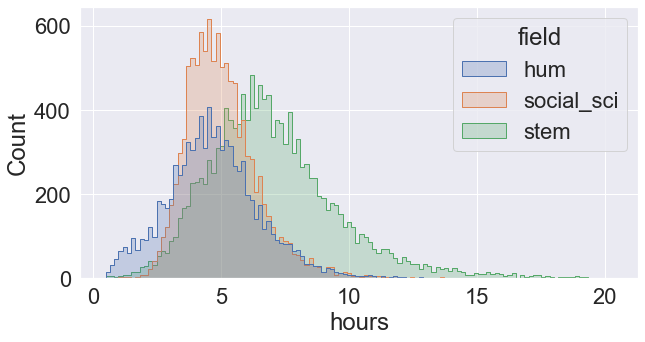

In [81]:
# generate comparative histograms of the three categories of courses in regard of studying hours
plot_hours = sns.histplot(cape, x="hours", hue="field", element="step")

In [82]:
print(stats.ttest_ind(cape_stem["hours"], cape_social_sci["hours"]))
print(stats.ttest_ind(cape_stem["hours"], cape_hum["hours"]))
print(stats.ttest_ind(cape_social_sci["hours"], cape_hum["hours"]))

Ttest_indResult(statistic=70.8863449890768, pvalue=0.0)
Ttest_indResult(statistic=72.59036427148578, pvalue=0.0)
Ttest_indResult(statistic=14.139333947772933, pvalue=3.633140106260217e-45)


The graph above shows the hours students say they spent on their classes, which seems to be all normally distributed. The hours spent in the STEM field (in green) spans from 2 hours all the way to 18 hours. However, students taking humanities and social science classes didn’t spend as much time as STEM students did. The majority of students who took social science classes indicated that they had spent between 4 to 7 hours. Similarly the majority of students who took humanities classes indicated the same. One interesting finding is that the kurtosis of `social_sci` seems to be higher than the other two fields.

T test indcates that the differences of the means are significant.

In [96]:
# A helper method for moving plot legends
# Thanks to Michael Waskom (https://github.com/mwaskom/seaborn/issues/2280)
def move_legend(ax, new_loc, **kws):
    old_legend = ax.legend_
    handles = old_legend.legendHandles
    labels = [t.get_text() for t in old_legend.get_texts()]
    title = old_legend.get_title().get_text()
    ax.legend(handles, labels, loc=new_loc, title=title, **kws)

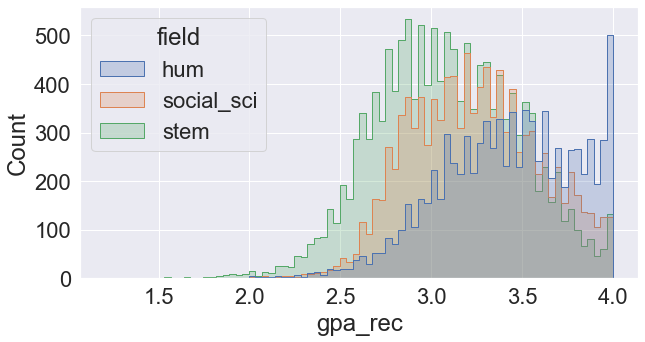

In [98]:
# generate comparative histograms of the three categories of courses in regard of GPA received
plot_gpa_rec = sns.histplot(cape, x="gpa_rec", hue="field", element="step")
move_legend(plot_gpa_rec, "upper left")

In [84]:
print(stats.ttest_ind(cape_stem["gpa_rec"], cape_social_sci["gpa_rec"]))
print(stats.ttest_ind(cape_stem["gpa_rec"], cape_hum["gpa_rec"]))
print(stats.ttest_ind(cape_social_sci["hours"], cape_hum["gpa_rec"]))

Ttest_indResult(statistic=-31.653056891974877, pvalue=1.4258059475604685e-215)
Ttest_indResult(statistic=-63.67821718528382, pvalue=0.0)
Ttest_indResult(statistic=102.77951709920775, pvalue=0.0)


The histogram above shows the gpa received by students in each field of courses, which are roughly normally distributed (Humanities courses seems to be an exception). The gpa received is a variable we are using to indicate the course difficulty. Therefore by the results shown above more students received lower grades in STEM classes in comparison to social science and humanities, so STEM classes are (by our definition) more difficult.

Again, T test seems to indicate that the differences are significant.

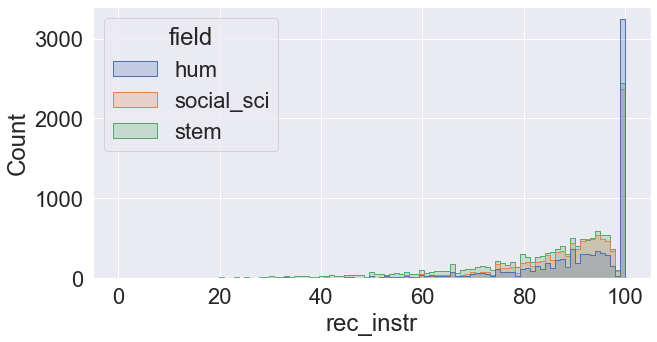

In [99]:
# generate comparative histograms of the three categories of courses in regard of teaching ratings
plot_rec_instr = sns.histplot(cape, x="rec_instr", hue="field", element="step")
move_legend(plot_rec_instr, "upper left")

In [100]:
print(stats.ttest_ind(cape_stem["rec_instr"], cape_social_sci["rec_instr"]))
print(stats.ttest_ind(cape_stem["rec_instr"], cape_hum["rec_instr"]))
print(stats.ttest_ind(cape_social_sci["rec_instr"], cape_hum["rec_instr"]))

Ttest_indResult(statistic=-25.149169521771366, pvalue=7.909849372741747e-138)
Ttest_indResult(statistic=-27.76587154642181, pvalue=6.969915604829554e-167)
Ttest_indResult(statistic=-5.921944165298532, pvalue=3.234930613764179e-09)


The `rec_instr` plot shows a curious shape. The number of overwhelmingly positive recommendations are extremely high, which gives all three plots a heavily left skewed shape. This is especially the case with Humanities courses. This may potentially undermine our assumptions.

T test again shows significance.

We then look that the __scatter matrix__ of the three fields.

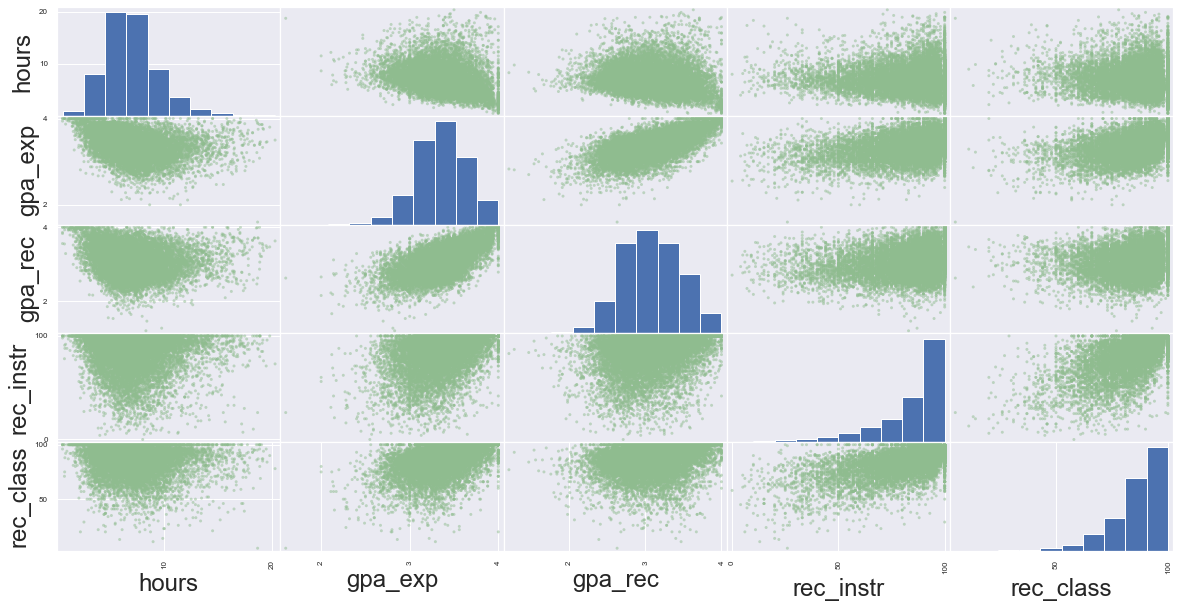

In [56]:
# generate a scatter matrix of stem professors
fig1 = pd.plotting.scatter_matrix(cape_stem[['hours','gpa_exp','gpa_rec','rec_instr','rec_class']], c='darkseagreen', figsize=(20, 10))

In the above scattermatrix, we see that the histogram for gpa_rec-- (a variable that is pertinent to our research question through its representation of course difficulty)-- follows an approximately normal distribution. This indicates that the majority of data points are relatively similar, in that they occur within a small range of values, with few outliers on the high and low ends (i.e. there were neither abnormally high average GPAs nor abnormally low ones). On the other hand, the histogram for rec_instr-- (a variable that is pertinent to our research question through its representation of students' perceptions of professors)-- is heavily skewed left, possibly indicating that students were more likely to give higher teacher recommendations as opposed to lower. This idea is further shown in the scatterplot depicting the relationship between gpa_rec (on the x-axis) and rec_instr (on the y-axis), whereby a larger density of points can be found situated in the topmost (higher) side of the plot, indicating typically higher recommendation values for a range of class GPAs. We will explore this relationship further to gain more insight of exactly how strong (or weak) this relationship between class GPA and teacher recommendation percentages is for STEM classes in comparison to those within the Social Science and Humanities departments.

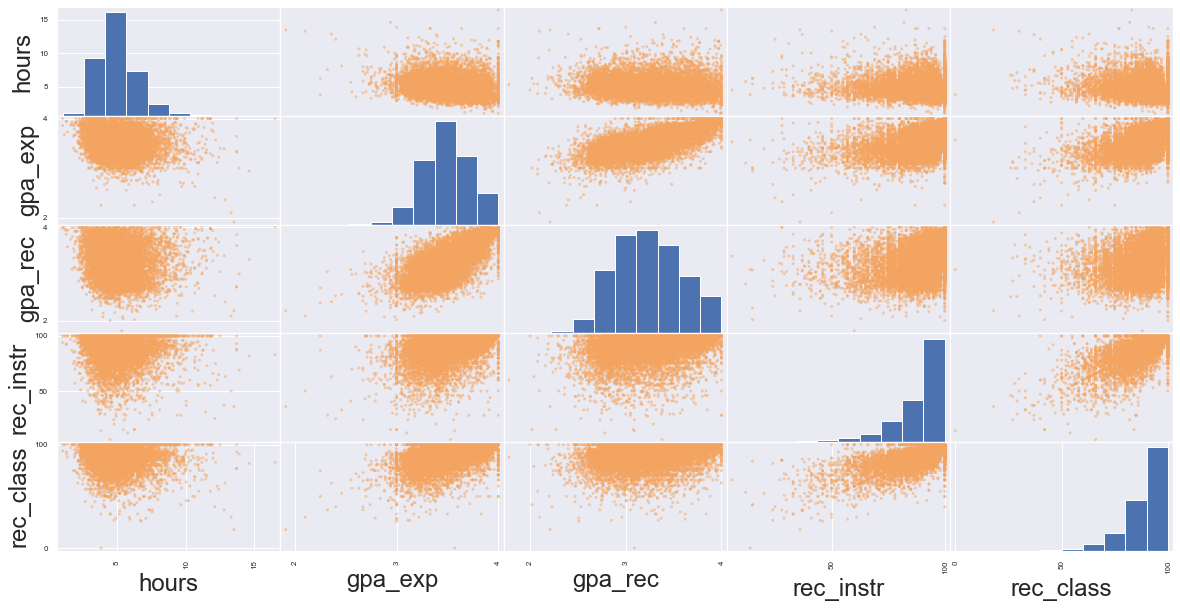

In [20]:
# generate a scatter matrix of social science professors
fig2 = pd.plotting.scatter_matrix(cape_social_sci[['hours','gpa_exp','gpa_rec','rec_instr','rec_class']], c='sandybrown', figsize=(20, 10))

Upon first comparison with the corresponding scatterplot for STEM classes, we can get a sense that the range of professor recommendation percentages given by students in Social Science courses are more clustered towards the higher end of the recommendation percentage scale; (the datapoints of the scatterplot for STEM classes were more varied on the y-axis). Taking this into account, we will explore how this may affect the relationship between class GPA and teacher recommendation percentages for Social Science classes and compare our results to those within the STEM and Humanities departments.

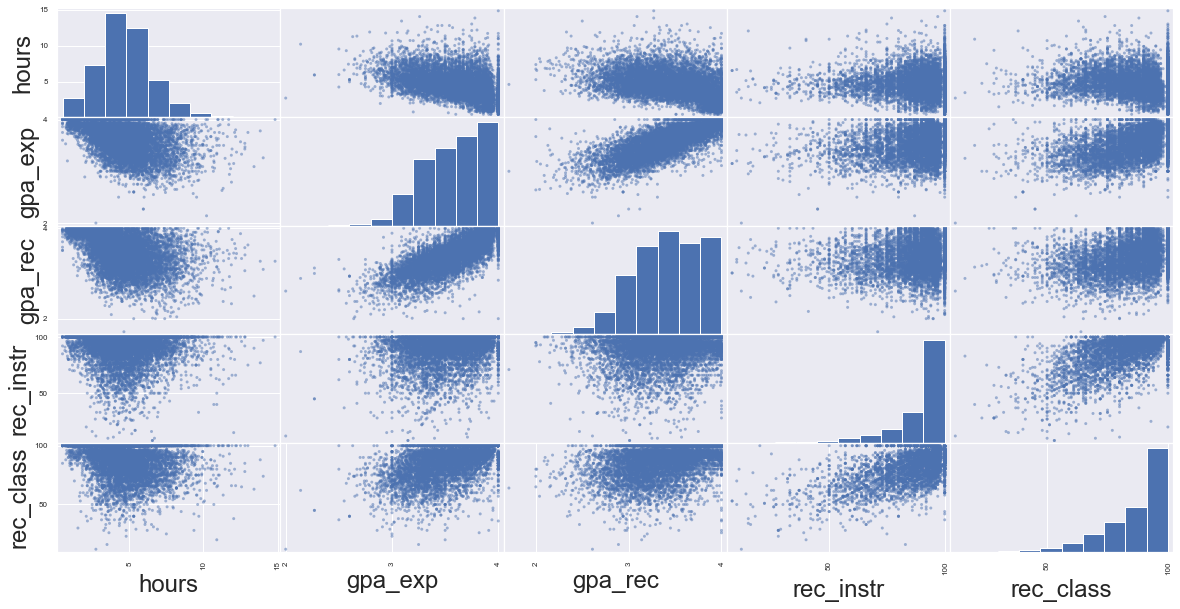

In [21]:
# generate a scatter matrix of humanities professors
fig3 = pd.plotting.scatter_matrix(cape_hum[['hours','gpa_exp','gpa_rec','rec_instr','rec_class']], figsize=(20, 10))

In the above scattermatrix, we see that the histogram for gpa_rec-- (a variable that is pertinent to our research question through its representation of course difficulty)-- is slightly skewed to the left. This indicates that unlike the distributions of average GPA for STEM and Social Science courses, students in Humanities courses tend to report a higher average GPA. Similar to the case with Social Science courses, in comparing this scatterplot with the corresponding scatterplot for STEM classes, we can get a sense that the range of instructor recommendation percentages for those taking Humanities courses are more clustered towards the higher end of the recommendation percentage scale. Taking this into account, we will explore how this may affect the relationship between class GPA and teacher recommendation percentages for Humanities classes and compare our results to those within the STEM and Social Science departments.

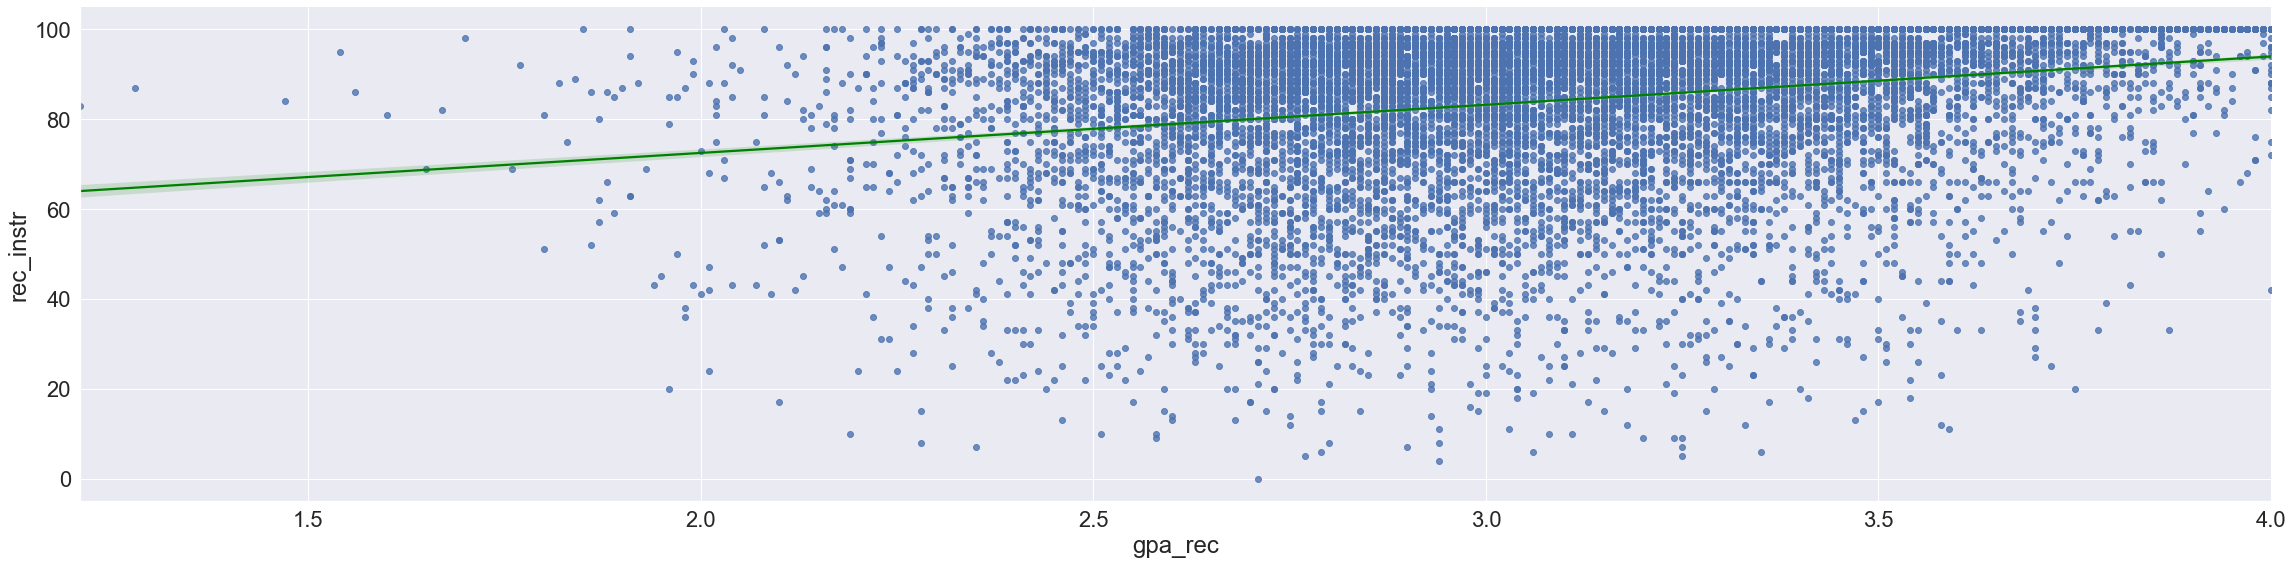

In [26]:
# Check the correlation between gpa_rec and rec_instr for STEM classes
plot1 = sns.lmplot(x='gpa_rec', y='rec_instr', data=cape_stem, line_kws={'color': 'green'}, fit_reg=True, height = 8, aspect = 4)

The figure above shows the correlation between the average gpa received by the students in STEM classes up against the percentage of those students who recommended that specific instructor who taught the STEM class. The figure shows a wide range when it comes to how many students recommended the instructor. The majority of instructors received over 20% recommendation rating. Also, the majority of the students received at least a 2.0 gpa or above.


In [27]:
# Construct and report a model that measures the relationship between gpa_rec & rec_instr
# for cape_stem
outcome1, predictor1 = patsy.dmatrices('rec_instr ~ gpa_rec', cape_stem)
model1 = sm.OLS(outcome1, predictor1)

results1 = model1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              rec_instr   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     903.3
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          2.49e-192
Time:                        22:05:42   Log-Likelihood:                -58488.
No. Observations:               13889   AIC:                         1.170e+05
Df Residuals:                   13887   BIC:                         1.170e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     51.0241      1.110     45.954      0.0

Looking at our OLS regression results for STEM classes we can see our best guess of what the intercept (our y intercept, beta 0) between our gpa received and instructor recommendation would be 51.28, and the standard error is 1.095, which indicates the majority of the data we have is clustered around our mean. Therefore, this indicates our coefficient intercept of 51.28 is very close to our true value.

If we look at our gpa received coefficient (beta 1, slope of the line) it suggests that as the gpa received increases the recommendation value for the instructor increases by 10.62.

Also, if you look at the standard error around the coefficient it is at 0.351, which means the error is moderate.

Finally, r-square value (6.1%) and the corresponding Pearson's r (0.25) seems to suggest that `gpa_rec` does not have a great explanatory power over `rec_instr` by itself.

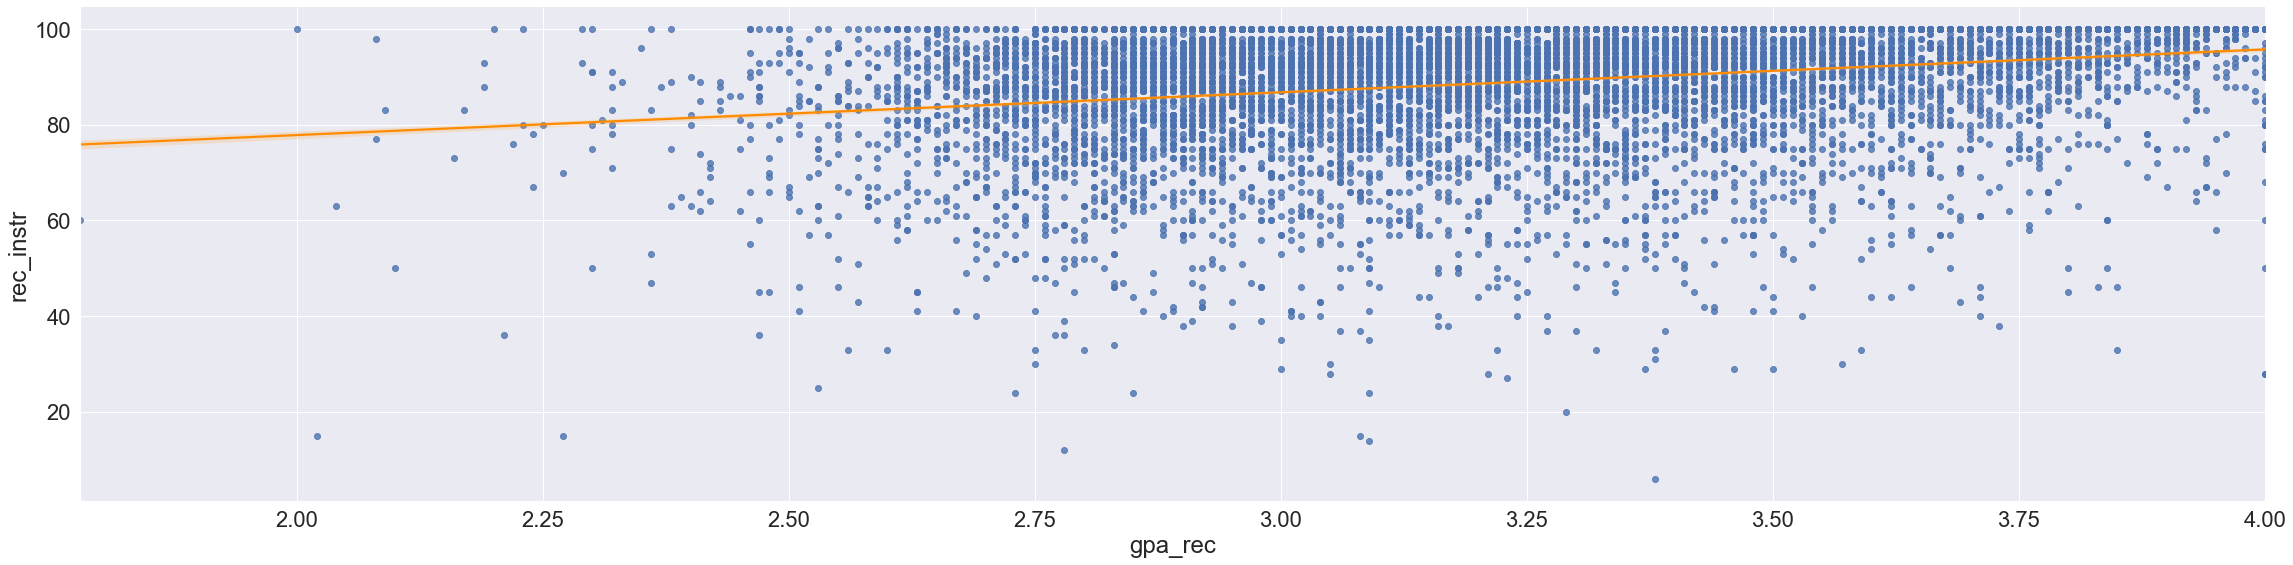

In [28]:
# Check the correlation between gpa_rec and rec_instr for social science classes
plot2 = sns.lmplot(x='gpa_rec', y='rec_instr', data=cape_social_sci, line_kws={'color': 'darkorange'}, fit_reg=True, height = 8, aspect = 4)

The figure above shows the correlation between the average gpa received by the students in social science classes up against the percentage of those students who recommended that specific instructor who taught the social science class. It shows that the majority of instructors received approximately 60% or above recommendation value. Therefore, over half the students who took their class would recommend them to other students.

Also, the majority of the students received on average at least a 2.5 gpa or above. If we compare these numbers to the STEM figure that shows that instructors received over 20% recommendation rate, this highlights social sciences have a higher recommendation rate but similar gpa received by the students.

In [29]:
# Construct and report a model that measures the relationship between gpa_rec & rec_instr
# for cape_social_sci
outcome2, predictor2 = patsy.dmatrices('rec_instr ~ gpa_rec', cape_social_sci)
model2 = sm.OLS(outcome2, predictor2)

results2 = model2.fit()

print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:              rec_instr   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     804.3
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          1.07e-170
Time:                        22:05:42   Log-Likelihood:                -41544.
No. Observations:               10749   AIC:                         8.309e+04
Df Residuals:                   10747   BIC:                         8.311e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.9502      1.029     58.280      0.0

Above is our OLS regression result for social science courses and instructors. If we compare these to the STEM regression results mentioned previously, we can see a slight increase for the (y) intercept, indicating a flater line.

If we look at our gpa received coefficient (beta 1, slope of the line) it suggests that as the gpa received increases the recommendation value for the instructor increases by 9.06. This figure is slightly smaller than the STEM figure of 10.62.

Again, the r-square value (7.0%) and the corresponding Pearson's r (0.26) suggests that `gpa_rec` does not have a great explanatory power over `rec_instr` by itself.

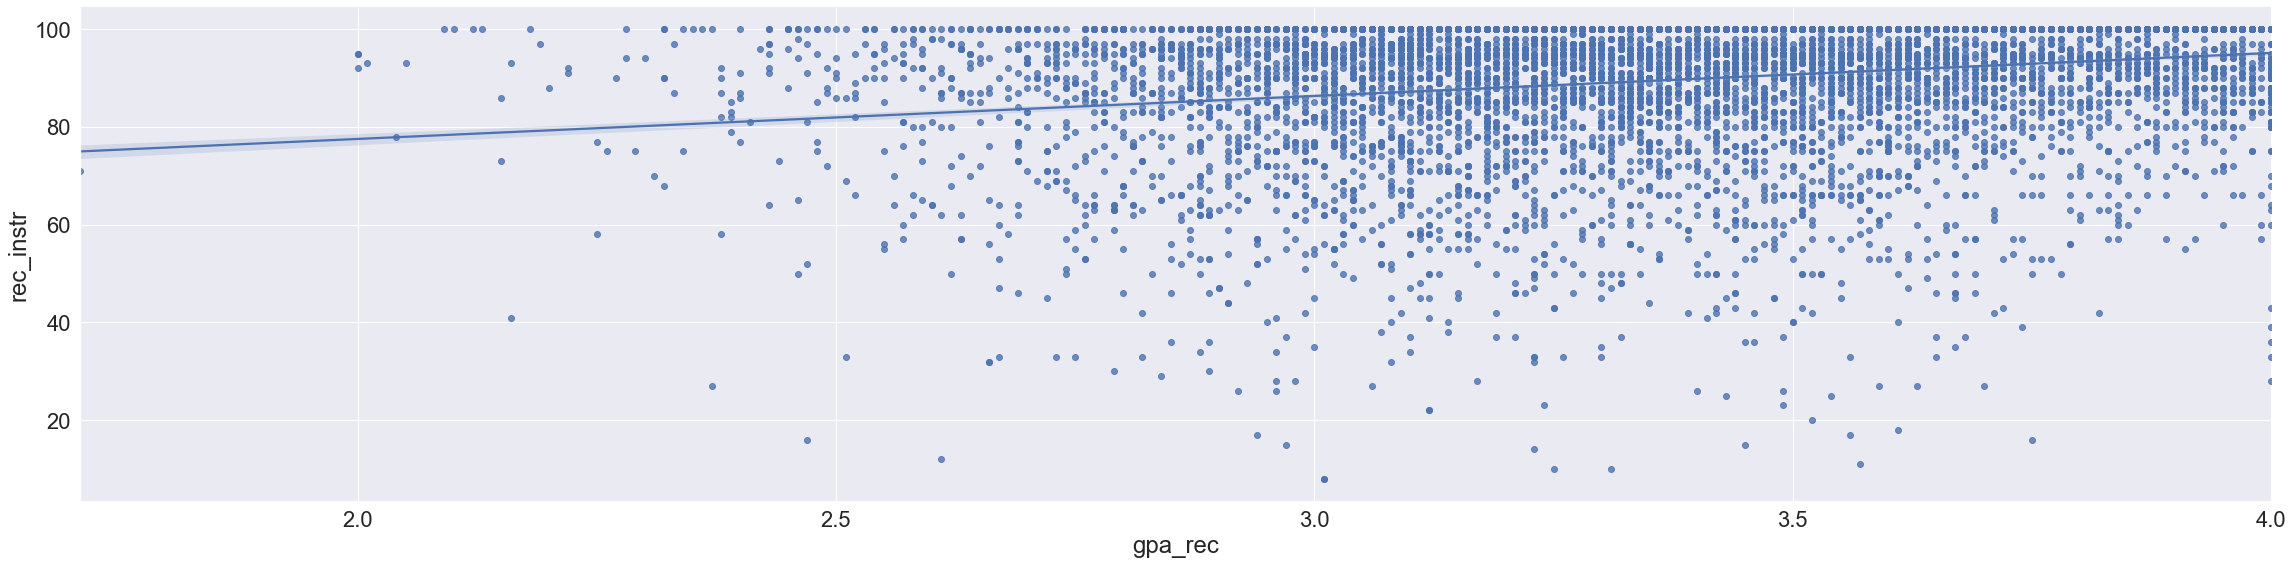

In [30]:
# Check the correlation between gpa_rec and rec_instr for humanities classes
plot3 = sns.lmplot(x='gpa_rec', y='rec_instr', data=cape_hum, fit_reg = True, height = 8, aspect = 4)

The figure above shows the correlation between the average gpa received by the students in humanity classes up against the percentage of those students who recommended that specific instructor who taught the humanity class. This figure shows that the majority of instructors received approximately 55% or above recommendation value. The majority of the students who took these classes received on average a 2.5 or above. Therefore, in comparison to social science classes, recommendation of instructors and gpa received is very similar. This can be seen in these figures as the patterns are almost identical. However, compared to STEM, humanities instructors have a higher recommendation rate. 

In [31]:
# Construct and report a model that measures the relationship between gpa_rec & rec_instr
# for cape_hum
outcome3, predictor3 = patsy.dmatrices('rec_instr ~ gpa_rec', cape_hum)
model3 = sm.OLS(outcome3, predictor3)

results3 = model3.fit()

print(results3.summary())

                            OLS Regression Results                            
Dep. Variable:              rec_instr   R-squared:                       0.061
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     569.6
Date:                Wed, 10 Mar 2021   Prob (F-statistic):          5.12e-122
Time:                        22:05:43   Log-Likelihood:                -34766.
No. Observations:                8760   AIC:                         6.954e+04
Df Residuals:                    8758   BIC:                         6.955e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     59.9364      1.268     47.269      0.0

The OLS regression results for humanity classes shows our best guess y intercept is at 57.3633 for our variables: gpa received and instructor recommendation. It shows the gapa received coefficient is 9.3271 which is nearly identical to social sciences classes with a coefficient of 9.06. It also has a similar standard error at 0.395 for humanity classes whereas for social sciences it is at 0.334.

Again, the r-square value (6.1%) and the corresponding Pearson's r (0.25) suggests that `gpa_rec` does not have a great explanatory power over `rec_instr` by itself.

We see from the scatter matrix that the shape of `rec_instr` and `re_class` graph seems to be more linear. We want to take closer look at that.

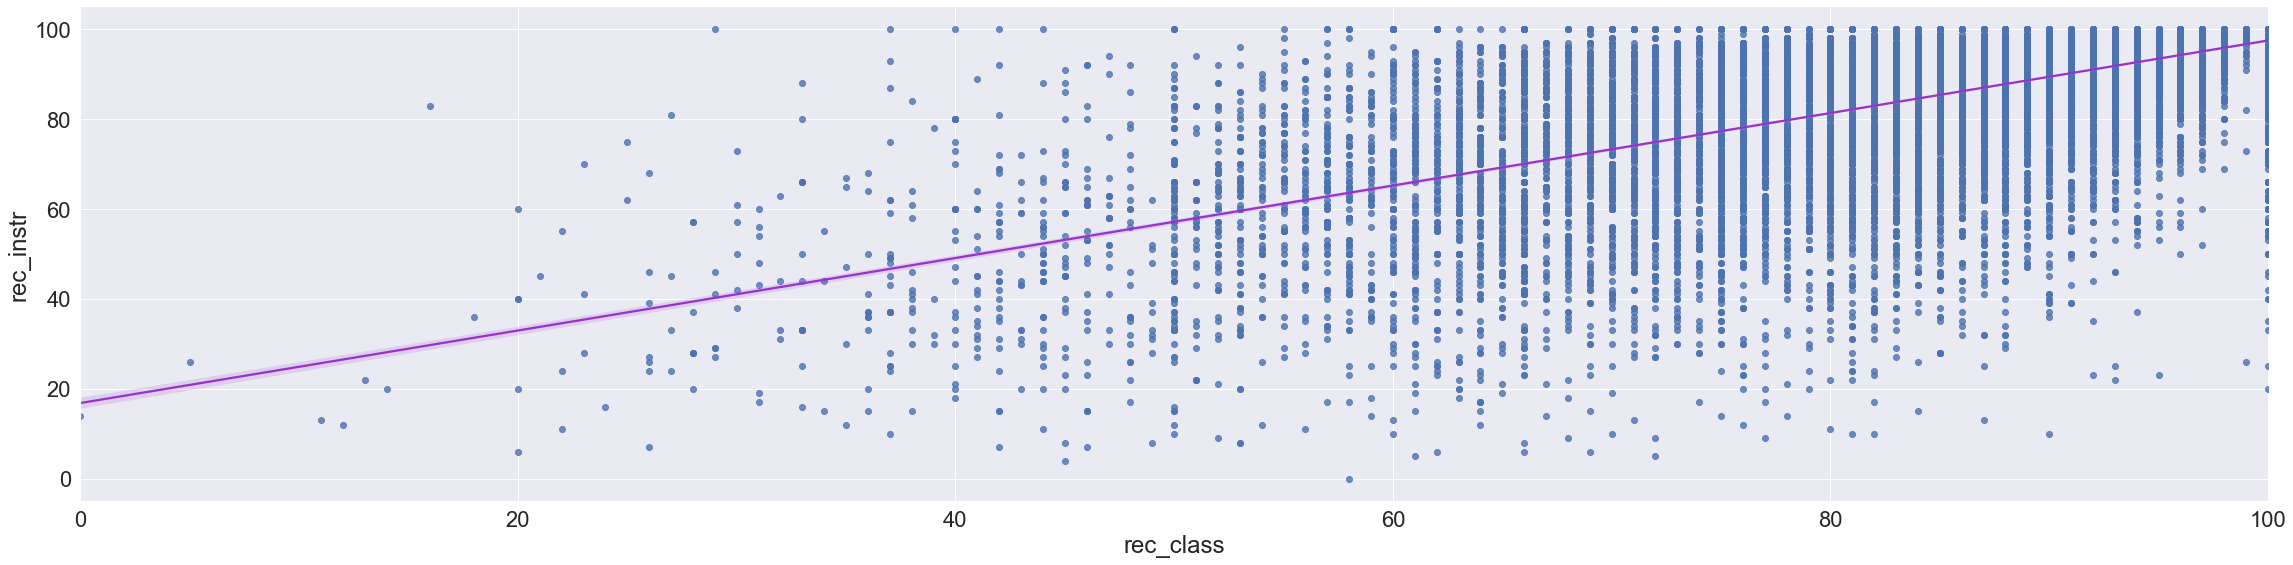

In [32]:
plot4 = sns.lmplot(x='rec_class', y='rec_instr', data=cape, line_kws={'color': 'darkorchid'},fit_reg = True, height = 8, aspect = 4)

In [33]:
outcome_rec_instr_4, predictor_rec_class = patsy.dmatrices('rec_instr ~ rec_class', cape)

model4 = sm.OLS(outcome_rec_instr_4, predictor_rec_class)

results4 = model4.fit()

print(results4.summary())

                            OLS Regression Results                            
Dep. Variable:              rec_instr   R-squared:                       0.439
Model:                            OLS   Adj. R-squared:                  0.439
Method:                 Least Squares   F-statistic:                 2.609e+04
Date:                Wed, 10 Mar 2021   Prob (F-statistic):               0.00
Time:                        22:05:44   Log-Likelihood:            -1.2757e+05
No. Observations:               33398   AIC:                         2.551e+05
Df Residuals:                   33396   BIC:                         2.552e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.8564      0.440     38.327      0.0

The result seems to show that in terms of correlation, __the Preason's r value between class recommendation and instructor recommendation is much higher than those of average gpa__. We may need to adjust our expectation accordingly.

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*